# Progress Report - Team Outliers

## Project Title - Gross Domestic Product and Economic Status of Countries

### Team Members - 
1. Advait Pai - apai21@uic.edu
2. Divyasha Pahuja - dpahuj2@uic.edu
3. Uday Nair - unair2@uic.edu
4. Utsav Sharma - usharm4@uic.edu

## Any Changes

// Development Status i.e. Under Developed etc, to now economic status based on the GNI

Reason - Economic Status ---> GNI
and GNI --> GDP therefore ES --> GDP

## Data

We are using data from the Organisation for Economic Co-operation and Development (OECD) and World Bank for different countries to carry out our predictions. The csv data is freely available on the website, which we have programmatically fetched these datasets from the website. This is done using a `driver.ipynb` notebook, which downloads the files and places them in a folder called `/data`.
These files are downloaded as CSVs from the website, and then are cleaned using the steps shown later in the document.

Our data is split across a number of datasets:


| Sr.no | Dataset | Description | Rows | Columns |
|-------|---------|-------------|------|---------|
| 1 | Share Prices | Share price indices are calculated from the prices of common shares of companies traded on national or foreign stock exchanges. | 35098 | 8 |
| 2 | Consumer Price Index | Inflation measured by consumer price index (CPI) is defined as the change in the prices of a basket of goods and services that are typically purchased by specific groups of households.| 293811 | 8 |
| 3 | Long Term Interest Rates | Long-term interest rates refer to government bonds maturing in ten years. Rates are mainly determined by the price charged by the lender, the risk from the borrower and the fall in the capital value. | 27365 | 8 |
| 4 | Labour Force | The labour force, or currently active population, comprises all persons who fulfil the requirements for inclusion among the employed (civilian employment plus the armed forces) or the unemployed. | 33517 | 8 |
| 5 | Exports and Imports | Defined as the transactions in goods and services between residents and non-residents. It is measured in million USD at 2015 constant prices. | 15922 | 8 |
| 6 | Household Spending | Household spending is the amount of final consumption expenditure made by resident households to meet their everyday needs, such as food, clothing, housing (rent), energy, transport, health costs, leisure.​ | 8862 | 8
| 7 | Government Spending | General government spending provides an indication of the size of government across countries. The large variation in this indicator highlights the variety of countries' approaches to delivering public goods and services and providing social protection, not necessarily differences in resources spent.​ | 10290 | 8 | 
| 8 | Tax Revenue | Tax revenue is defined as the revenues collected from taxes on income and profits, social security contributions, taxes levied on goods and services, payroll taxes, taxes on the ownership and transfer of property, and other tax. | 3549 | 8 |
| 9 | Investment GFCF | Gross fixed capital formation (GFCF), also called "investment", is defined as the acquisition of produced assets (including purchases of second-hand assets), including the production of such assets by producers for their own use, minus disposals. | 24513 | 8 |
| 10 | GDP | Gross domestic product (GDP) is the standard measure of the value added created through the production of goods and services in a country during a certain period. As such, it also measures the income earned from that production, or the total amount spent on final goods and services (less imports). | 5162 | 8 |
| 11 | Economic Category | This dataset contains the labels for the economic status of a country, which we will be using to perform classification. | 239 | 37 |
| 12 | Net Primary Income from Aborad | Net primary income includes the net labor income and net property and entrepreneurial income components of the SNA. Labor income covers compensation of employees paid to nonresident workers. Property and entrepreneurial income covers investment income from the ownership of foreign financial claims (interest, dividends, rent, etc.) and nonfinancial property income (patents, copyrights, etc.). | 266 | 63 |

The datasets `Share Prices`, `Consumer Price Index`, `Long Term Interest Rates`, `Labour Force`, `Exports and Imports`, `Household Spending`, `Government Spending`, `Tax Revenue` and `Investment GFCF` are indicators for `GDP`. The data from these datasets will be used to predict our target value of `GDP`.

The datatsets `GDP`,`Net Primary Income from Aborad ` are indicators of the GNI of a country, which helps us classify the the countries into Income Classes (`Economic Category`).

## Research Questions

1. Given that we develop a regression model that predicts the Gross Domestic Product(GDP) of countries by using leading and lagging factors such as inflation, household spending, trade, tax revenue, etc. from Organization for Economic Co-operation and Development(OECD) datasets, our hypothesis ranks the importance of these leading and lagging factors.
2. Using the historical data of Gross Domestic Product(GDP) of countries, we attempt to forecast the GDP using the time series data.  
3. Classification of countries as per their income classes (Lower, Lower Middle, Upper Middle and High) using economic and social indicators gathered from Exploratory Data Analysis (EDA) of OECD data.
4. After conducting exploratory data analysis (EDA) on the OECD dataset, we use the resulting indicators to perform cluster analysis to determine the optimal number of clusters for classifying countries based on their income classes.

## Data Cleaning - WIP

### GDP Yearly:

To clean this dataset, we load the CSV file from the `data/uncleaned` directory, and check the head to ensure that it loads properly. The initial shape of the dataframe is `(5222,8)` 

Then, we check the unique values in the column `MEASURE`. This tells us that this column has the values `MLN_USD` and `USD_CAP`.
We also check for the columns `FREQUENCY` and `SUBJECT`, where the unique values are `A` and `TOT` respectively.

The column `Flag_Codes` is of no use to us, so we drop it. For `MEASURE`, we keep the values with `MLN_USD` only.

Before we drop any columns, we need to check the number of unique values per column. From this, the columns `INDICATOR`,`SUBJECT`,`FREQUENCY` and `MEASURE` can be dropped now since they have only 1 value in them and do not add any information.

Now, we can check the `null` values for all columns. The dataset that we have no `null` values, so we do not need to handle this.

After our cleaning, the shape of a dataframe is `(2675,3)`, which is then exported to a .csv file and placed in the `data/temp` folder.

#### Original Data Sizes

In [16]:
import pandas as pd
base_path = '../data/uncleaned/'
print('Original Dataset Shapes\n')


# 1. Share Prices Data
df_sp_uc = pd.read_csv(base_path+'share_prices.csv')
print("Share Prices Shape:",df_sp_uc.shape)
# 2. Inflation CPI Data
df_cpi_uc = pd.read_csv(base_path+'inflation_cpi.csv')
print("Inflation CPI Spend Shape:",df_cpi_uc.shape)
# 3. Long Term Interest Rates
df_lti_uc = pd.read_csv(base_path+'long_term_ir.csv')
print("Long Term Interest Rates Shape:",df_lti_uc.shape)
# 4. Labour Force Date
df_lf_uc = pd.read_csv(base_path+'labour_force.csv')
print("Labour Force Shape:",df_lf_uc.shape)
# 5. Trade in Government Spend Data
df_exp_imp_uc = pd.read_csv(base_path+'trade_in_gs.csv')
print("Trade in Government Spend Shape:",df_exp_imp_uc.shape)
# 6. Household Spend
df_hspend_uc = pd.read_csv(base_path+'household_spend.csv')
print("Household Spend Shape:",df_hspend_uc.shape)
# 7. Government Spending
df_gspend_uc = pd.read_csv(base_path+'government_spend.csv')
print("Gov Spend Shape:",df_gspend_uc.shape)
# 8. Tax Revenue
df_tax_uc = pd.read_csv(base_path+'tax_revenue.csv')
print("Tax Revenue Shape:",df_tax_uc.shape)
# 9. Investment GCFC
df_gfcf_uc = pd.read_csv(base_path+'investment_gfcf.csv')
print("Investment GCFC Shape:",df_gfcf_uc.shape)
# 10. GDP Yearly Data
df_gdp_uc = pd.read_csv(base_path+'gdp_yearly.csv')
print("GDP Yearly Shape:",df_gdp_uc.shape)
# 11. FDI Data
# df_fdi_in_uc = pd.read_csv(base_path+'FDI_inflow.csv')
df_fi_uc_shape = (266*62,3)
print("Foreign Income Shape:", df_fi_uc_shape)
# df_fdi_out_uc = pd.read_csv(base_path+'foreign_income.csv')
# 12. GNI Data
# df_gni = pd.read_csv(base_path+'economic_category.csv')
df_gni_uc_shape = (218*35,3)
print("GNI Yearly Shape:", df_gni_uc_shape)

Original Dataset Shapes

Share Prices Shape: (35144, 8)
Inflation CPI Spend Shape: (294281, 8)
Long Term Interest Rates Shape: (27439, 8)
Labour Force Shape: (33714, 8)
Trade in Government Spend Shape: (16103, 8)
Household Spend Shape: (8938, 8)
Gov Spend Shape: (10466, 8)
Tax Revenue Shape: (3549, 8)
Investment GCFC Shape: (24597, 8)
GDP Yearly Shape: (5222, 8)
Foreign Income Shape: (16492, 3)
GNI Yearly Shape: (7630, 3)


#### Final Sizes

In [17]:
import pandas as pd
base_path = '../data/temp/'
print('Final Dataset Shapes\n')
# 1. Share Prices Data
df_sp = pd.read_csv(base_path+'share_prices_cleaned.csv')
print("Share Prices Shape:",df_sp.shape)
# 2. Inflation CPI Data
df_cpi = pd.read_csv(base_path+'inflation_cpi_cleaned.csv')
print("Inflation CPI Spend Shape:",df_cpi.shape)
# 3. Long Term Interest Rates
df_lti = pd.read_csv(base_path+'long_term_ir_cleaned.csv')
print("Long Term Interest Rates Shape:",df_lti.shape)
# 4. Labour Force Date
df_lf = pd.read_csv(base_path+'labour_force_cleaned.csv')
print("Labour Force Shape:",df_lf.shape)
# 5. Trade in Government Spend Data
df_exp_imp = pd.read_csv(base_path+'trade_in_gs_cleaned.csv')
print("Trade in Government Spend Shape:",df_exp_imp.shape)
# 6. Household Spend
df_hspend = pd.read_csv(base_path+'household_spend_cleaned.csv')
print("Household Spend Shape:",df_hspend.shape)
# 7. Government Spending
df_gspend = pd.read_csv(base_path+'government_spend_cleaned.csv')
print("Gov Spend Shape:",df_gspend.shape)
# 8. Tax Revenue
df_tax = pd.read_csv(base_path+'tax_revenue_cleaned.csv')
print("Tax Revenue Shape:",df_tax.shape)
# 9. Investment GCFC
df_gfcf = pd.read_csv(base_path+'investment_gfcf_cleaned.csv')
print("Investment GCFC Shape:",df_gfcf.shape)
# 10. GDP Yearly Data
df_gdp = pd.read_csv(base_path+'gdp_yearly_cleaned.csv')
print("GDP Yearly Shape:",df_gdp.shape)
# 11. FDI Data
df_fi = pd.read_csv(base_path+'foreign_income_cleaned.csv')
print("Net Foreign Income Shape:",df_fi.shape)
# 12. GNI Data
df_gni = pd.read_csv(base_path+'economic_category_cleaned.csv')
print("GNI Yearly Shape:",df_gni.shape)

Final Dataset Shapes

Share Prices Shape: (2065, 3)
Inflation CPI Spend Shape: (2840, 3)
Long Term Interest Rates Shape: (1587, 3)
Labour Force Shape: (1993, 3)
Trade in Government Spend Shape: (2641, 3)
Household Spend Shape: (1955, 3)
Gov Spend Shape: (654, 3)
Tax Revenue Shape: (1697, 3)
Investment GCFC Shape: (2635, 3)
GDP Yearly Shape: (2675, 3)
Net FDI Shape: (9063, 3)
GNI Yearly Shape: (7161, 3)


In [ ]:
def DataLoss(uncl, cl):
    x = uncl[0] - cl[0]
    y = uncl[1] - cl[1]
    return (x,y)

In [21]:
# 1. Share Prices Data
print("Share Prices Data Loss:",DataLoss(df_sp_uc.shape , df_sp.shape))
# 2. Inflation CPI Data
print("Inflation CPI Spend Data Loss:",DataLoss(df_cpi_uc.shape , df_cpi.shape))
# 3. Long Term Interest Rates
print("Long Term Interest Rates Data Loss:",DataLoss(df_lti_uc.shape , df_lti.shape))
# 4. Labour Force Date
print("Labour Force Data Loss:", DataLoss(df_lf_uc.shape , df_lf.shape))
# 5. Trade in Government Spend Data
print("Trade in Government Spend Data Loss:",DataLoss(df_exp_imp_uc.shape , df_exp_imp.shape))
# 6. Household Spend
print("Household Spend Data Loss:",DataLoss(df_hspend_uc.shape , df_hspend.shape))
# 7. Government Spending
print("Gov Spend Data Loss:",DataLoss(df_gspend_uc.shape , df_gspend.shape))
# 8. Tax Revenue
print("Tax Revenue Data Loss:",DataLoss(df_tax_uc.shape , df_tax.shape))
# 9. Investment GCFC
print("Investment GCFC Data Loss:",DataLoss(df_gfcf_uc.shape , df_gfcf.shape))
# 10. GDP Yearly Data
print("GDP Yearly Data Loss:",DataLoss(df_gdp_uc.shape ,  df_gdp.shape))
# 11. FDI Data
print("Foreign Income Data Loss:", DataLoss(df_fi_uc_shape , df_fi.shape))
# 12. GNI Data
print("GNI Yearly Data Loss:", DataLoss(df_gni_uc_shape , df_gni.shape))

Share Prices Data Loss: (33079, 5)
Inflation CPI Spend Data Loss: (291441, 5)
Long Term Interest Rates Data Loss: (25852, 5)
Labour Force Data Loss: (31721, 5)
Trade in Government Spend Data Loss: (13462, 5)
Household Spend Data Loss: (6983, 5)
Gov Spend Data Loss: (9812, 5)
Tax Revenue Data Loss: (1852, 5)
Investment GCFC Data Loss: (21962, 5)
GDP Yearly Data Loss: (2547, 5)
Foreign Income Data Loss: (7429, 0)
GNI Yearly Data Loss: (469, 0)


In [ ]:
## Renaming Columns

df_sp = df_sp.rename(columns={'Value':'Share_Price'})
df_cpi = df_cpi.rename(columns={'Value':'Inflation_CPI'})
df_lti = df_lti.rename(columns={'Value':'LT_Interest'})
df_lf = df_lf.rename(columns={'Value':'Labor_Force'})
df_exp_imp = df_exp_imp.rename(columns={'NTRVAL':'Trade_Goverment'})
df_hspend = df_hspend.rename(columns={'Value':'H_Spend'})
df_gspend = df_gspend.rename(columns={'Value':'G_Spend'})
df_tax = df_tax.rename(columns={'Value':'Tax'})
df_gfcf = df_gfcf.rename(columns={'Value':'Investment'})
df_gdp = df_gdp.rename(columns={'Value':'GDP'})
df_gni = df_gni.rename(columns={'Value':'GNI'})

In [ ]:
df_sp.head()

,LOCATION,TIME,Share_Price
0,AUS,1958,2.613002
1,AUS,1959,3.256618
2,AUS,1960,3.966841
3,AUS,1961,3.653984
4,AUS,1962,3.678260


In [ ]:
df_cpi.head()

,LOCATION,TIME,Inflation_CPI
0,AUS,1949,3.738101
1,AUS,1950,4.063153
2,AUS,1951,4.852566
3,AUS,1952,5.688414
4,AUS,1953,5.943812


In [ ]:
df_lti.head()

,LOCATION,TIME,LT_Interest
0,PRT,1994,10.478330
1,PRT,1995,11.465000
2,PRT,1996,8.559167
3,PRT,1997,6.358333
4,PRT,1998,4.877500


In [ ]:
df_lf.head()

,LOCATION,TIME,Labor_Force
0,MEX,2005,43631.50
1,MEX,2006,44982.52
2,MEX,2007,45904.54
3,MEX,2008,46769.21
4,MEX,2009,48018.36


In [ ]:
df_exp_imp.head()

,LOCATION,TIME,Trade_Goverment
0,AUS,1959,1221.210
1,AUS,1960,467.848
2,AUS,1961,3915.866
3,AUS,1962,1787.544
4,AUS,1963,2725.988


In [ ]:
df_hspend.head()

,LOCATION,TIME,H_Spend
0,AUS,1970,30476.510257
1,AUS,1971,32799.844017
2,AUS,1972,35590.183565
3,AUS,1973,41114.456624
4,AUS,1974,48461.851872


In [ ]:
df_gspend.head()

,LOCATION,TIME,G_Spend
0,AUS,2007,13737.93
1,AUS,2008,14835.57
2,AUS,2009,15963.85
3,AUS,2010,15802.56
4,AUS,2011,16535.76


In [ ]:
df_tax.head()

,LOCATION,TIME,Tax
0,AUS,1965,5.608
1,AUS,1966,5.996
2,AUS,1967,6.631
3,AUS,1968,7.405
4,AUS,1969,8.488


In [ ]:
df_gfcf.head()

,LOCATION,TIME,Investment
0,AUS,1960,7594.023
1,AUS,1961,7555.709
2,AUS,1962,8263.204
3,AUS,1963,9144.787
4,AUS,1964,10182.874


In [ ]:
df_gdp.head()

,LOCATION,TIME,GDP
0,AUS,1960,25071.833
1,AUS,1961,25363.455
2,AUS,1962,27953.904
3,AUS,1963,30431.547
4,AUS,1964,32742.466


In [ ]:
df_gni = df_gni.dropna()
df_gni.head()

,LOCATION,TIME,GNI
0,AFG,1987,L
2,DZA,1987,UM
3,ASM,1987,H
6,ATG,1987,UM
7,ARG,1987,UM


## Exploratory Data Analysis

### GDP Dataset

In [27]:
dfs = [df_lti,df_lf,df_exp_imp,df_hspend,df_tax,df_gfcf,df_gdp]
df_merge_gdp = pd.merge(df_sp,df_cpi,how='outer',on=['LOCATION','TIME'])
for d in dfs:
    df_merge_gdp = pd.merge(df_merge_gdp,d,how='outer',on=['LOCATION','TIME'])
df_gdp_shape_before = df_merge_gdp.shape
print("Shape of GDP Dataset Before Cleaning:",df_gdp_shape_before)
df_merge_gdp = df_merge_gdp.dropna()
# df_merge_gdp = df_merge_gdp.drop(columns=['LOCATION','TIME','H_Spend',"Investment","Trade_Goverment"])
df_merge_gdp = df_merge_gdp.drop(columns=['LOCATION','TIME']).reset_index(drop=True)
print("Shape of GDP Dataset After Cleaning:",df_merge_gdp.shape)
df_merge_gdp.head()
print("Data Loss:", DataLoss(df_gdp_shape_before, df_merge_gdp.shape))

Shape of GDP Dataset Before Cleaning: (3603, 11)
Shape of GDP Dataset After Cleaning: (1065, 9)
Data Loss: (2538, 2)


/var/folders/d5/kbrmypln0nnfft9htnrprljc0000gp/T/ipykernel_5900/1284482108.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Value_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merge_gdp = pd.merge(df_merge_gdp,d,how='outer',on=['LOCATION','TIME'])
/var/folders/d5/kbrmypln0nnfft9htnrprljc0000gp/T/ipykernel_5900/1284482108.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Value_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merge_gdp = pd.merge(df_merge_gdp,d,how='outer',on=['LOCATION','TIME'])
/var/folders/d5/kbrmypln0nnfft9htnrprljc0000gp/T/ipykernel_5900/1284482108.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Value_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merge_gdp = pd.merge(df_merge_gdp,d,how='outer',on=['LOCATION','TIME'])


In [ ]:
# GDP Data Description
df_merge_gdp.describe()

,Share_Price,Inflation_CPI,LT_Interest,Labor_Force,Trade_Goverment,H_Spend,Tax,Investment,GDP
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1.065000e+03,1065.000000,1.065000e+03,1.065000e+03
mean,78.145746,79.698521,5.430886,17982.273092,-1650.701272,6.674355e+05,356.503445,2.579701e+05,1.164511e+06
std,64.346393,23.822362,3.689449,29515.416510,95927.985079,1.665916e+06,677.455490,5.368084e+05,2.524961e+06
min,3.054441,6.700533,-0.523833,145.400000,-988060.724000,3.156788e+03,1.767000,1.118213e+03,6.268439e+03
25%,33.733540,66.444680,2.754167,2721.400000,-3546.129000,8.004702e+04,50.173000,3.543663e+04,1.647204e+05
50%,75.870530,84.038980,4.894242,5297.725000,4987.949000,1.741438e+05,115.411000,8.127168e+04,3.442944e+05
75%,101.283400,99.601300,7.611667,23348.500000,21292.141000,6.127016e+05,354.407000,2.483558e+05,1.143106e+06
max,657.822300,127.189200,22.497500,163538.700000,255017.100000,1.590258e+07,6112.256000,4.939579e+06,2.331508e+07


In [ ]:
# Pairwise correlation of columns
cm_gdp = df_merge_gdp.corr()
print(cm_gdp)

                 Share_Price  Inflation_CPI  LT_Interest  Labor_Force  \
Share_Price         1.000000       0.485505    -0.416852    -0.096930   
Inflation_CPI       0.485505       1.000000    -0.769152    -0.018194   
LT_Interest        -0.416852      -0.769152     1.000000    -0.049360   
Labor_Force        -0.096930      -0.018194    -0.049360     1.000000   
Trade_Goverment    -0.038930      -0.024756     0.011605    -0.669144   
H_Spend             0.006554       0.125756    -0.154909     0.879641   
Tax                 0.009295       0.174946    -0.216608     0.887238   
Investment          0.015375       0.156245    -0.194292     0.905655   
GDP                 0.011974       0.152546    -0.187781     0.895119   

                 Trade_Goverment   H_Spend       Tax  Investment       GDP  
Share_Price            -0.038930  0.006554  0.009295    0.015375  0.011974  
Inflation_CPI          -0.024756  0.125756  0.174946    0.156245  0.152546  
LT_Interest             0.011605 -0.15

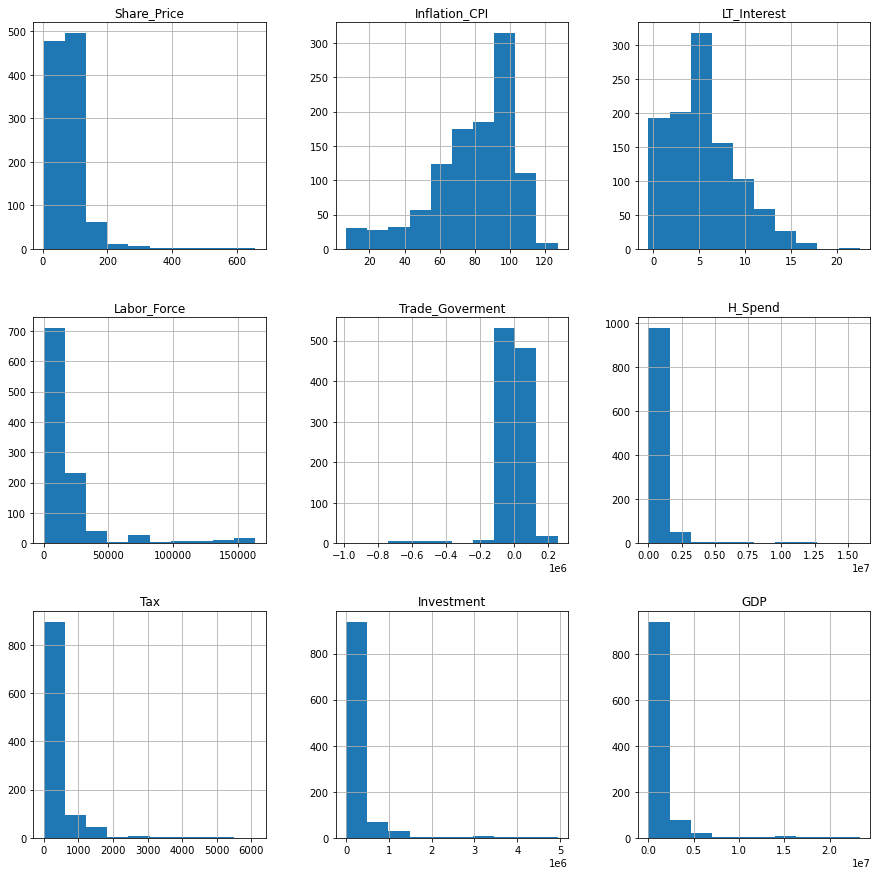

In [32]:
df_merge_gdp.hist(figsize=(15,15)) 
plt.show()

<AxesSubplot:>

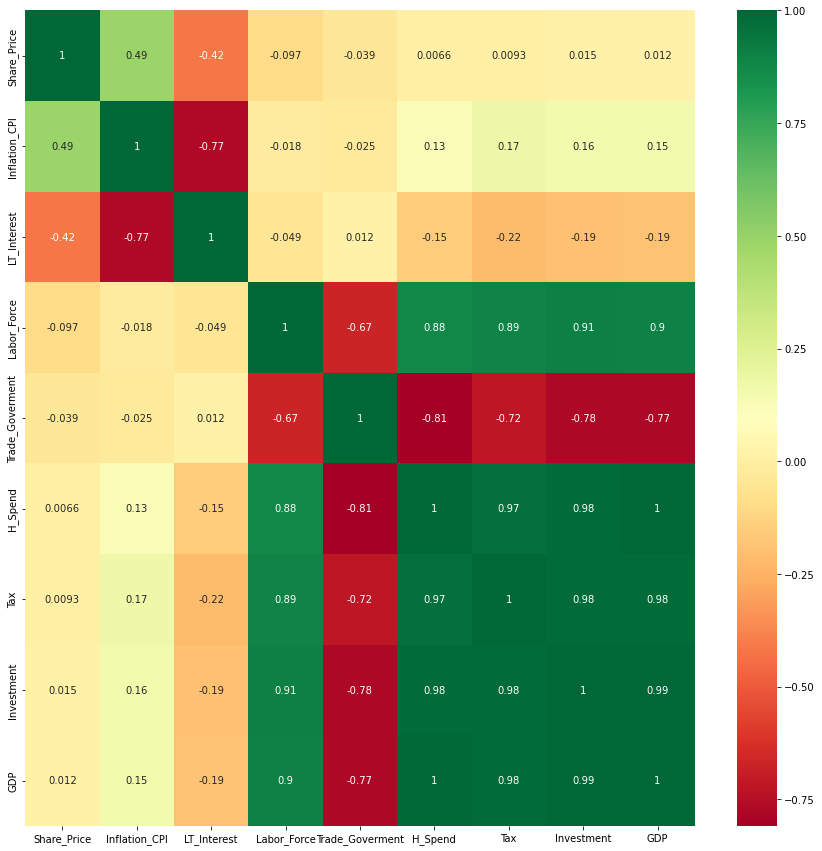

In [ ]:
# Correlation Matrix Visualization 
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(15,15))
#plot heat map
sns.heatmap(cm_gdp, annot=True, cmap="RdYlGn")

### Income Group Dataset

In [ ]:
dfs = [df_lti,df_lf,df_exp_imp,df_hspend,df_tax,df_gfcf,df_gni]
df_merge_gni = pd.merge(df_sp,df_cpi,how='outer',on=['LOCATION','TIME'])
for d in dfs:
    df_merge_gni = pd.merge(df_merge_gni,d,how='outer',on=['LOCATION','TIME'])
df_merge_gni = df_merge_gni.dropna()
# df_merge_gni = df_merge_gni.drop(columns=['LOCATION','TIME','H_Spend',"Investment","Trade_Goverment"])
df_merge_gni = df_merge_gni.drop(columns=['LOCATION','TIME']).reset_index(drop=True)
print("Shape of gni Dataset:",df_merge_gni.shape)
df_merge_gni.head()

Shape of gni Dataset: (943, 9)


,Share_Price,Inflation_CPI,LT_Interest,Labor_Force,Trade_Goverment,H_Spend,Tax,Investment,GNI
0,31.04002,43.11586,13.19167,7749.125,16128.982,137662.806790,68.479,72484.821,H
1,26.97814,46.22707,12.10417,7964.500,6266.440,149366.901166,81.716,81271.683,H
2,28.96189,49.70977,13.40833,8224.468,6061.140,162749.855492,88.850,82948.542,H
3,26.76051,53.35500,13.18000,8443.166,16159.452,169853.765646,90.808,74785.917,H
4,27.82293,55.04992,10.69083,8480.917,20802.917,177805.033539,85.140,71752.851,H


In [ ]:
df_merge_gni['GNI'].value_counts()

H     881
UM     61
LM      1
Name: GNI, dtype: int64

In [ ]:
# GDP Data Description
df_merge_gni.describe()

,Share_Price,Inflation_CPI,LT_Interest,Labor_Force,Trade_Goverment,H_Spend,Tax,Investment
count,943.000000,943.000000,943.000000,943.000000,943.000000,9.430000e+02,943.000000,9.430000e+02
mean,86.714929,85.852423,4.743017,17327.697777,-2236.065354,7.102623e+05,381.864538,2.740325e+05
std,63.416335,16.733300,3.169418,29164.768672,101116.071322,1.753916e+06,711.155315,5.632870e+05
min,6.045171,39.771550,-0.523833,145.400000,-988060.724000,3.156788e+03,1.881000,1.118213e+03
25%,50.829340,73.103890,2.342084,2715.225000,-3854.973500,8.361167e+04,54.346000,3.798015e+04
50%,82.104140,88.680430,4.519166,5100.075000,4689.344000,1.803211e+05,122.217000,8.517746e+04
75%,105.139750,100.000000,6.414167,22917.260000,21525.656000,6.683286e+05,400.505500,2.770226e+05
max,657.822300,127.189200,22.497500,163538.700000,255017.100000,1.590258e+07,6112.256000,4.939579e+06


In [ ]:
# Pairwise correlation of columns
cm_gni = df_merge_gni.corr()
print(cm_gni)

                 Share_Price  Inflation_CPI  LT_Interest  Labor_Force  \
Share_Price         1.000000       0.351728    -0.302904    -0.081486   
Inflation_CPI       0.351728       1.000000    -0.769907     0.029641   
LT_Interest        -0.302904      -0.769907     1.000000    -0.090062   
Labor_Force        -0.081486       0.029641    -0.090062     1.000000   
Trade_Goverment    -0.036127      -0.018369    -0.004349    -0.696457   
H_Spend            -0.020955       0.104622    -0.143714     0.916843   
Tax                -0.031225       0.141229    -0.200354     0.930557   
Investment         -0.016011       0.136751    -0.185664     0.942293   

                 Trade_Goverment   H_Spend       Tax  Investment  
Share_Price            -0.036127 -0.020955 -0.031225   -0.016011  
Inflation_CPI          -0.018369  0.104622  0.141229    0.136751  
LT_Interest            -0.004349 -0.143714 -0.200354   -0.185664  
Labor_Force            -0.696457  0.916843  0.930557    0.942293  
Trade_G

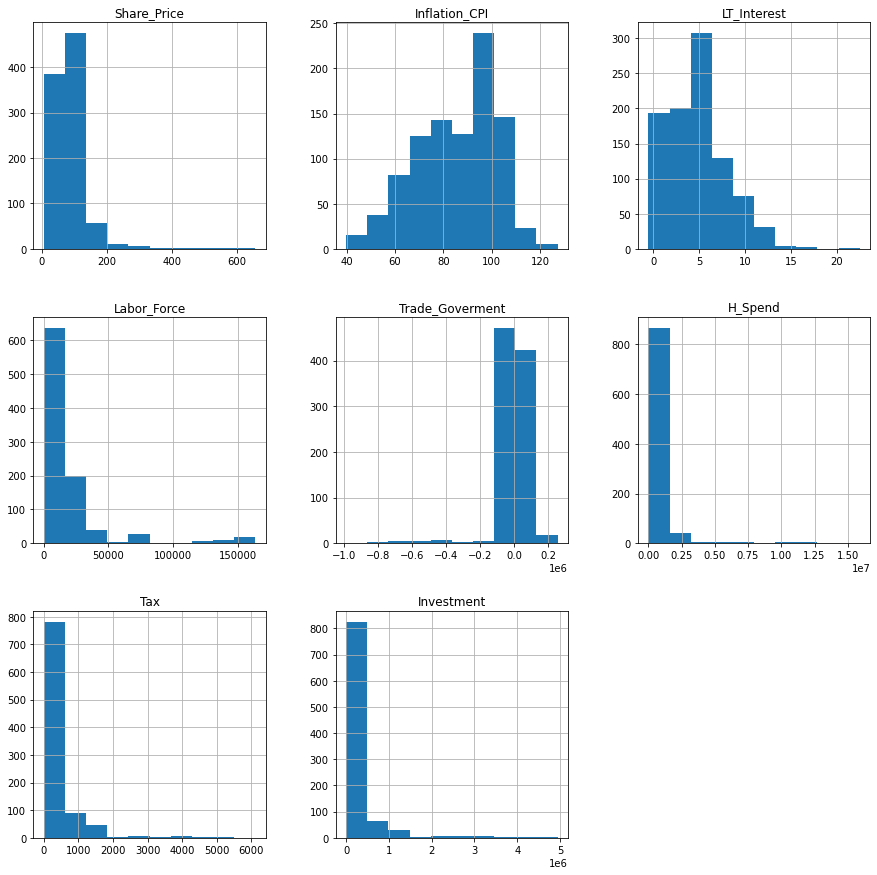

In [30]:
df_merge_gni.hist(figsize=(15,15)) 
plt.show()

<AxesSubplot:>

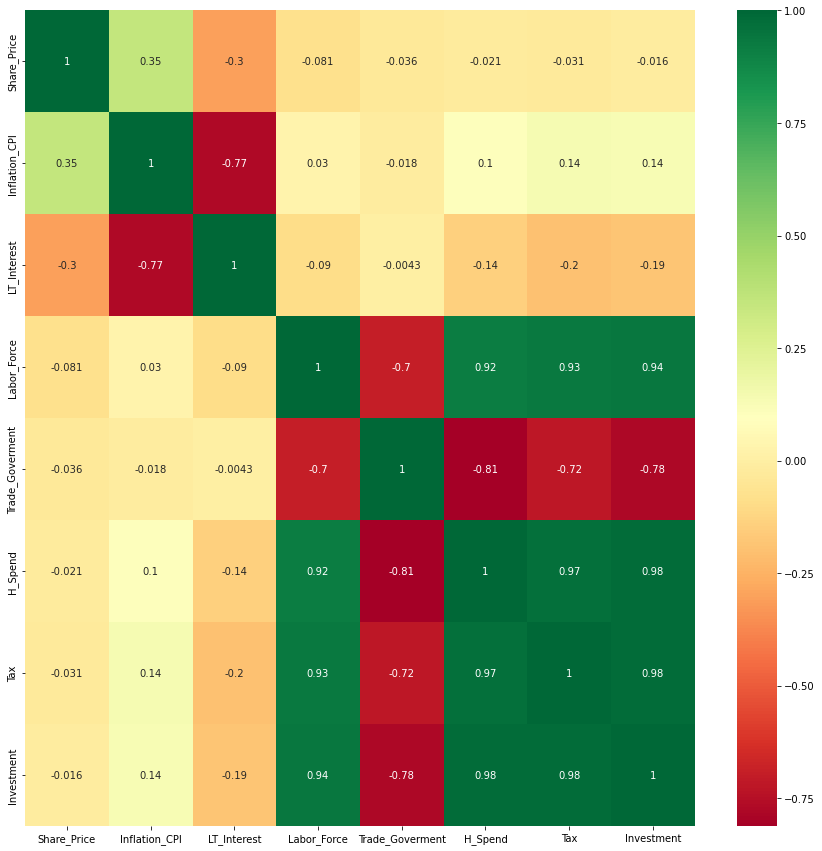

In [ ]:
# Correlation Matrix Visualization 
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(15,15))
#plot heat map
sns.heatmap(cm_gni, annot=True, cmap="RdYlGn")

## Reflection

### What is the hardest part of the project that you’ve encountered so far?

The hardest part was creating the final datasets that would go into our models.
Here are a few instances that we found:
1. For our x independent variables for Hyp 1, we had to clean and collate seperate datasets for each of these into a single dataset. 
Each dataset had different measures, subjects, and frequency for each variable which required individual inspection and cleaning before collation.
2. The predictors for GNI which will be used to classify the income group of the country, were unlcear and hard to find. Moreover, the historical dataset with labels assigned to income classes of all the countries for previous years was not easily available. Once we found it, we had to unpivot the dataset to make it suitable for our classification model.

### What are your initial insights?

1. Intially for hypothesis 3, we had planned to classify countries into their respective development status such as Developed, Under-developed and Emerging. After reserarching for data sources that would help us extract these labels per country per year, we realized that there is no solid dataset present for this and a better indicator of a countries economic status is it's income class which can be identified from the country's GNI. Hence we have changed the scope of Hyp3 to classifying countries into their respective income groups. This has a two fold benefit as we were able to build a dataset as well as find a direct correlation between GDP and GNI, where GNI is used to classify the countries into their income groups, hence strengthen our research.
2. The Year range is different for each country and also varies in each feature, which on combining of datasets of all the features will leads to loss of all those samples that don't match. 
3. The Government Spending dataset did not have enough data for us to include it in our model. For most of the countires, the data was available going back till only 2007, which is insufficient for the model. Including this in our final dataframe would have resulted in too much data loss, which is why we are dropping this dataset.

### Are there any concrete results you can show at this point? If not, why not?

#### Hypothesis 1: 

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error

# Extra Trees Regressor Model
model = ExtraTreesRegressor(random_state=236)
X = df_merge_gdp.drop(columns=["GDP"])
Y = df_merge_gdp['GDP'].to_numpy()
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X_norm,Y,test_size=0.3,random_state=236)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

# Model Metrics
print("R^2_Score:",r2_score(Y_test,Y_pred))
print("Mean Absolute Error:",mean_absolute_error(Y_test,Y_pred))

#Feature Importances
sum = 0
print("\nFeature Importances:")
for i in range(len(model.feature_importances_)):
    print("\t",X.columns[i]+":",model.feature_importances_[i]*100)
    sum+= model.feature_importances_[i]

print("\nSum:",sum)

R^2_Score: 0.9981114038963094
Mean Absolute Error: 26001.22811578123

Feature Importances:
	 Share_Price: 0.5441364742942831
	 Inflation_CPI: 1.4068186636229303
	 LT_Interest: 1.2097938638674077
	 Labor_Force: 15.787803761899022
	 Trade_Goverment: 8.176110399621143
	 H_Spend: 30.590589213475937
	 Tax: 17.58065495411976
	 Investment: 24.704092669099524

Sum: 1.0


#### Hypothesis 3:

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
model = ExtraTreesClassifier()
X = df_merge_gni.drop(columns=["GNI"])
Y = df_merge_gni['GNI'].to_numpy()
scaler = MinMaxScaler()
# X = X.iloc[:,:3]
X_norm = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X_norm,Y,test_size=0.3)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
# print(confusion_matrix(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred,labels=df_merge_gni['GNI'].unique()))
print(df_merge_gni['GNI'].unique())


0.9717314487632509
[[259   1   0]
 [  6  16   0]
 [  0   1   0]]
['H' 'UM' 'LM']


# IGNORE FROM HERE

In [ ]:
# df_merge['GNI'].value_counts()

In [ ]:
# dfs = [df_lf,df_gfcf,df_gni]
# df_merge = pd.merge(df_hspend,df_tax,how='outer',on=['LOCATION','TIME'])
# for d in dfs:
#     df_merge = pd.merge(df_merge,d,how='outer',on=['LOCATION','TIME'])
# df_merge = df_merge.dropna()
# # df_merge = df_merge.drop(columns=['LOCATION','TIME','H_Spend',"Investment","Trade_Goverment"])
# df_merge = df_merge.drop(columns=['LOCATION','TIME'])
# df_merge

In [ ]:
# df_temp = pd.merge(df_gdp,df_gni, how="inner",on=['LOCATION','TIME'])
# df_temp['GNI'].value_counts()

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.metrics import accuracy_score
# model = ExtraTreesClassifier()
# X = df_temp['GDP'].to_numpy().reshape(-1,1)
# Y = df_temp['GNI']
# scaler = MinMaxScaler()
# # X = X.iloc[:,:3]
# X_norm = scaler.fit_transform(X)
# X_train,X_test,Y_train,Y_test = train_test_split(X_norm,Y,test_size=0.3)
# model.fit(X_train,Y_train)

In [ ]:
# Y_pred = model.predict(X_test)
# print(accuracy_score(Y_test,Y_pred,))

In [ ]:
# dfs = [df_lti,df_lf,df_exp_imp,df_hspend,df_tax,df_gfcf]


# IGNORE TILL HERE

### Going forward, what are the current biggest problems you’re facing?

1. Elaborating on what was mentioned in the inital insight, after merging of the datasets of all the features of GDP (on Country and Year), data loss is seen. Moving ahead, this will pose a problem for our Regression model for GDP, as the model will have less data to train on. 
2. Furthermore, on merging the GNI factors(FDI inflow and outflow) with all the GDP indepdent variables, the number of samples returned are low and significant skew in the labels in the dataset is also seen.

### Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

Currently, the project is on schedule as it was projected. 

### Given your initial exploration of the data, is it worth proceeding with your project, and why? If not, how are you going to change your project and why do you think it’s better than your current results?

After data gathering, cleaning, EDA and model results we feel that the project is worth proceeding. 
But as highlighted in the previous reflections, we have redirected our project and research question a little according to the insights from the inital exploration of our Hypothesis. 
We changed course and are now predicting the income classes each country for Hypothesis 3 instead of Development status.

## Next Steps

### What do you plan to accomplish in the next month and how do you plan to evaluate whether your project achieved the goals you set for it?

As discussed before, we have built preliminary models for Hyp 1 and 3. We will try a few more models and compare the models to choose the best working model based on the evaluation metrics. 
Out of the models specified for the Time series Analysis we will choose the appropriate model for our Hypothesis. We can also create the model for each and analyse on the basis of the reported results.
After concluding on the technique, we will build the final model for Hypothesis 2 and 4.
For clustering in Hypothesis 4, we will settle on best value of clusters using the Elbow method.

For Hyp 1, we will check the feature importances and identify the features with highest weightage and compare with the varibales used in the formula of GDP.
For Hyp 2, we will check the R2 score for checking the strength of the model built and whether if it is a good model for our goal of Forecasting GDP.
In Hyp 3, we can check the Classification report for the metrics of the final model, and evaluate the the model to see how well it achieves our goal of classifying the countries into income classes.

## References

https://www.investopedia.com/articles/investing/051415/how-calculate-gdp-country.asp

https://www.britannica.com/money/gross-national-income

#### Data Sources:
1. Share Prices: https://data.oecd.org/price/share-prices.htm
2. CPI: https://data.oecd.org/price/inflation-cpi.htm#indicator-chart
3. Long Term Interest Rates: https://data.oecd.org/interest/long-term-interest-rates.htm
4. Labour Force: https://data.oecd.org/emp/labour-force.htm
5. Trade: https://data.oecd.org/trade/trade-in-goods-and-services.htm
6. Household Spending: https://data.oecd.org/hha/household-spending.htm
7. Government Spending: https://data.oecd.org/gga/general-government-spending.htm
8. Tax Revenue: https://data.oecd.org/tax/tax-revenue.htm
9. Investment GFCF: https://data.oecd.org/gdp/investment-by-sector.htm
10. GDP: https://data.oecd.org/gdp/gross-domestic-product-gdp.htm
11. Economic Category: https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups
10. Net Primary Income from Aborad: https://data.worldbank.org/indicator/NY.GSR.NFCY.CD 